# Gráficas con GNUplot en IHaskell

En este libro se exponen mediante ejemplos cómo insertar gráficas en IHaskell con GNUplot.

La exposición se basa en la del uso de GNUplot en Haskell del curso de I1M: [Representación gráfica de funciones con gnuplot](https://www.cs.us.es/~jalonso/cursos/i1m/temas/tema-13.html#representación-gráfica-de-funciones-con-gnuplot)

## Importación de librerías

Se importan las siguientes librerías

In [1]:
import System.IO.Unsafe (unsafePerformIO)
import qualified Graphics.Gnuplot.Plot.TwoDimensional   as P
import qualified Graphics.Gnuplot.Graph.TwoDimensional  as G
import qualified IHaskell.Display                       as D 
import Graphics.Gnuplot.Simple

## Función de muestra de dibujo

Para simplificar la muestra de los dibujos se define la función `dibuja`

In [2]:
dibuja x = D.Display [unsafePerformIO (graphDataPNG2P x)]

<interactive>:1:40: error: Variable not in scope: graphDataPNG2P :: t -> IO IHaskell.Display.DisplayData

## Representación de funciones con P.funtion y G.lines

Representación de la función coseno

In [3]:
dibuja (P.function G.lines [0,0.01..10] sin)

<interactive>:1:1: error: Variable not in scope: dibuja :: P.T Double Double -> t

## Rango lineal

`(xRango n (a,b))` es la lista de los puntos obtenidos al dividir el segmento (a,b) en n partes iguales.

In [4]:
xRango :: Integer -> (Double,Double) -> [Double]
xRango n i = P.linearScale n i

Por ejemplo,

In [5]:
xRango 5 (0,10)

[0.0,2.0,4.0,6.0,8.0,10.0]

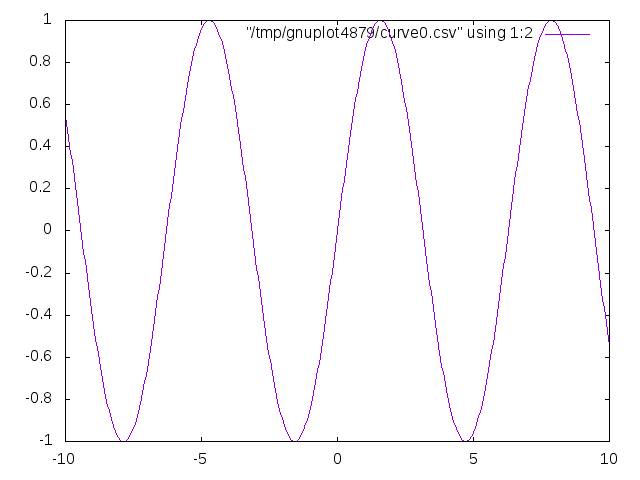

In [6]:
dibuja (P.function G.lines (xRango 500 (-10,10)) sin)

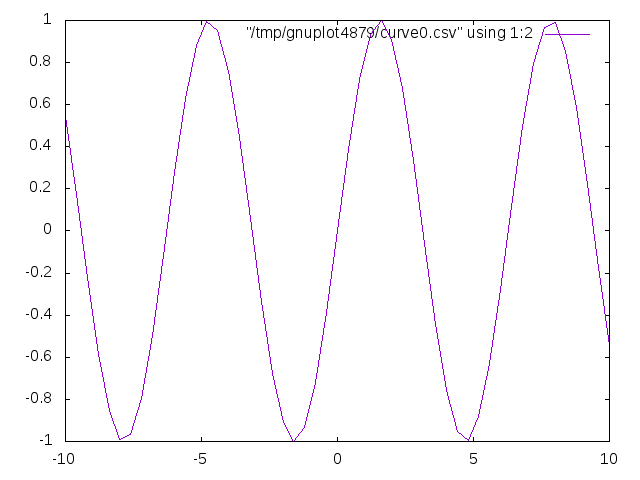

In [7]:
dibuja (P.function G.lines (xRango 50 (-10,10)) sin)

## Dibujo de listas de puntos 

Vamos a dibujar términos de la sucesión de Fibonacci. Para ello, en primer lugar definimos la sucesión

In [8]:
fibs :: [Double] 
fibs = 0 : 1 : zipWith (+) fibs (tail fibs)

Por ejemplo,

In [9]:
take 30 fibs

[0.0,1.0,1.0,2.0,3.0,5.0,8.0,13.0,21.0,34.0,55.0,89.0,144.0,233.0,377.0,610.0,987.0,1597.0,2584.0,4181.0,6765.0,10946.0,17711.0,28657.0,46368.0,75025.0,121393.0,196418.0,317811.0,514229.0]

Su representación gráfica se obtiene con

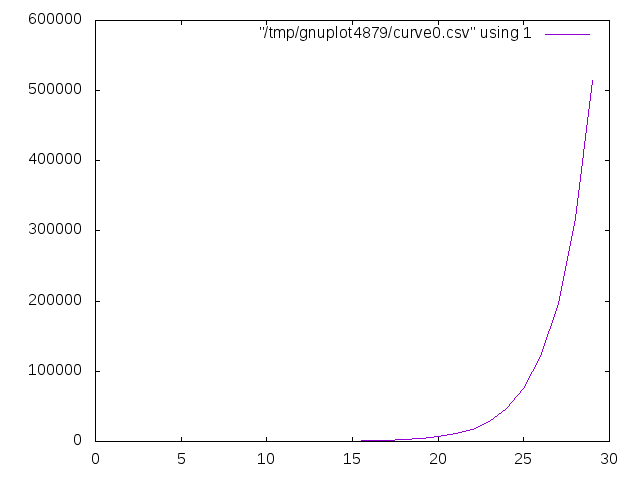

In [10]:
dibuja (P.list G.listLines (take 30 fibs))

o bien con

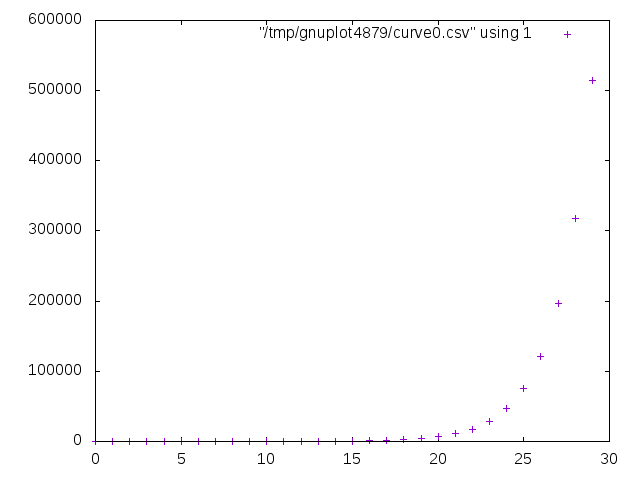

In [11]:
dibuja (P.list G.listPoints (take 30 fibs))

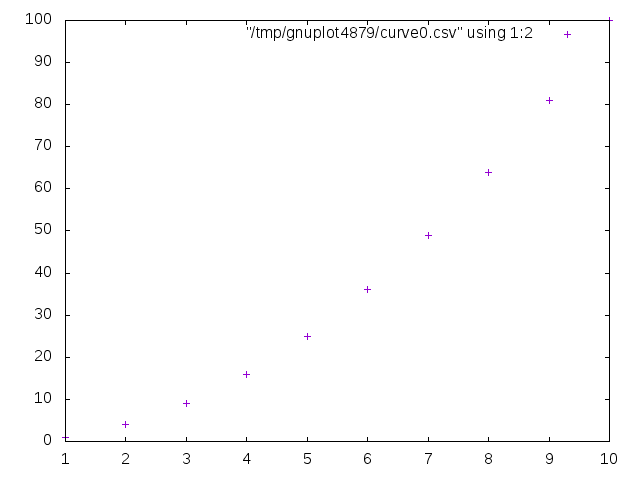

In [12]:
dibuja (P.function G.points [1..10] (^2))

dibuja (P.function G.points [1..10] (^2))

## Gráficas conjuntas

Un dibujo puede contener la gráfica de  varias funciones. Por ejemplo, las del seno y el coseno:

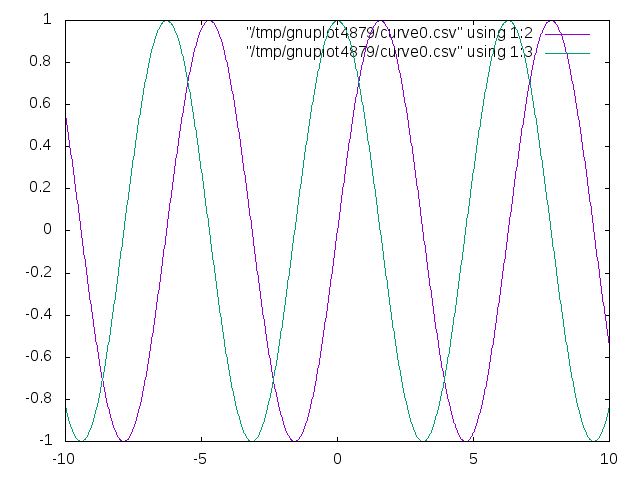

In [15]:
dibuja (P.functions G.lines (xRango 1000 (-10,10)) [sin, cos])

## Gráfica de curvas paramétricas

Se puede dibuja las gráfica de función definidas en forma paramétrica. Por ejemplo,

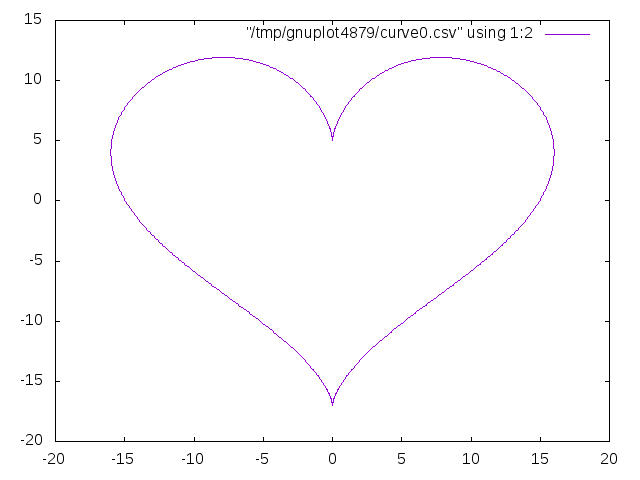

In [14]:
dibuja (P.parameterFunction 
        G.lines
        (P.linearScale 1000 (0,2*pi))
        (\t -> (12*sin t - 4*sin(3*t),
                13*cos t - 5*cos(2*t)-2*cos(3*t)-cos(4*t))))